In [66]:
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [109]:
dealroom_path = "/home/alex/vscode/data/processado/dealroom/companies_5500.xlsx"
dfd = pd.read_excel(dealroom_path)
dfd.drop_duplicates(subset=["id"], inplace=True)


In [239]:
print(dfd.shape)
select = dfd['LAST ROUND'].isin(['ANGEL', 'SEED', 'EARLY VC', 'SERIES A', 'SERIES B', 'SERIES C', 'SERIES D', 'LATE VC', 'ACQUISITION'])
dfd = dfd[select]
cat_type = CategoricalDtype(categories=['ANGEL', 'SEED', 'EARLY VC', 'SERIES A', 'SERIES B', 'SERIES C', 'SERIES D', 'LATE VC', 'ACQUISITION'], ordered=True)
dfd['LAST ROUND'] = dfd['LAST ROUND'].astype(cat_type)
dfd['EMPLOYEES'] = dfd['EMPLOYEES'].str[1:]
cat_employees = CategoricalDtype(categories=['11-50', '51-200'], ordered=True)
dfd['EMPLOYEES'] = dfd['EMPLOYEES'].astype(cat_employees)
dfd['N_MALES'] = dfd['FOUNDERS GENDERS'].str.count(r"\b(male)\b")
dfd['N_FEMALES'] = dfd['FOUNDERS GENDERS'].str.count(r"\b(female)\b")
dfd['GENDER_PROPORTION'] = 100 * dfd['N_MALES'] / (dfd['N_MALES'] + dfd['N_FEMALES'])
print(dfd.shape)

(5265, 58)
(5265, 58)


In [240]:
import re
# dfd['first_funding_year'] = 
# df_startup['FIRST FUNDING DATE'] = df_startup['FIRST FUNDING DATE'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d") if type(x) == str else x)
dfd['first_funding_year'] = dfd['FIRST FUNDING DATE'].apply(lambda x: int(re.findall("\d{4}",str(x))[0]) )
dfd['launch_year'] = dfd['LAUNCH DATE'].apply(lambda x: int(re.findall("\d{4}", str(x))[0]) )
dfd['first_funding_period_years'] = dfd['first_funding_year'] - dfd['launch_year']

dfd['last_funding_year'] = dfd['LAST FUNDING DATE'].apply(lambda x: int(re.findall("\d{4}",str(x))[0]) )
dfd['last_funding_period_years'] = 2020 - dfd['launch_year']
dfd['average_funding_period'] = dfd['last_funding_period_years'] / dfd['TOTAL ROUNDS NUMBER']


In [241]:
# dfd_2015 = dfd[dfd[]]

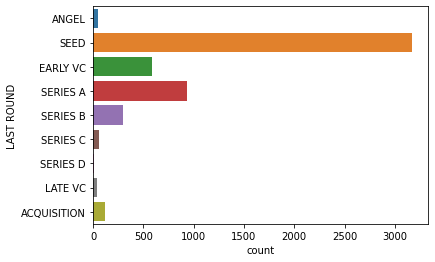

In [242]:
ax = sns.countplot(y="LAST ROUND", data=dfd)

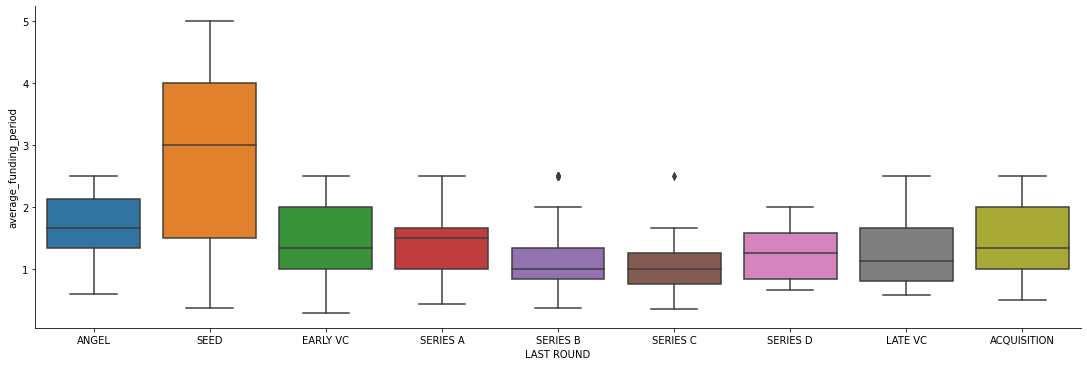

In [243]:
ax = sns.catplot(y="average_funding_period", data=dfd, kind="box", x="LAST ROUND", aspect=3)


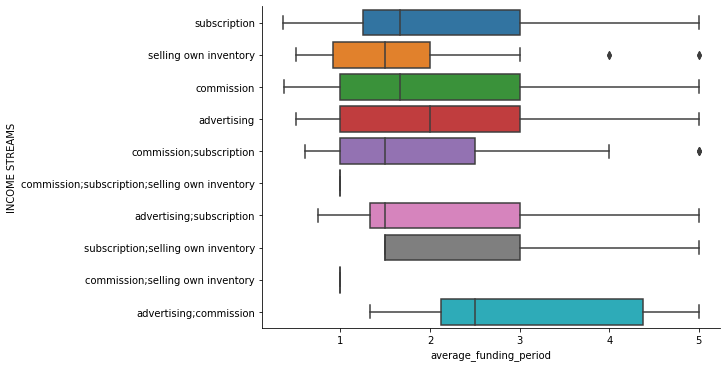

In [244]:
# plt.subplots(figsize=(30,10))
sns.catplot(x="average_funding_period", data=dfd, kind="box", y="INCOME STREAMS", orient="h", aspect=2)

In [245]:
# sns.catplot(x="last_funding_period_years", data=dfd, kind="box", y="INDUSTRIES", orient="h", aspect=2)
industries = dfd[['INDUSTRIES', 'id']].assign(INDUSTRIES=dfd.INDUSTRIES.str.split(';')).explode('INDUSTRIES')
dfd_industries = industries.merge(right=dfd, on='id', how='left')
dfd_relevant_industries = dfd_industries[dfd_industries['INDUSTRIES_x'].isin(['energy', 'media', 'transportation', 'health', 'fintech', 'education', 'enterprise software', 'marketing'])]

In [246]:
# dfd_pivoted = dfd_industries.pivot(index='id', columns="INDUSTRIES_x", values="average_funding_period")

In [247]:
# fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
# sns.heatmap(dfd.corr(), annot=True, linewidths=.5, ax=ax)

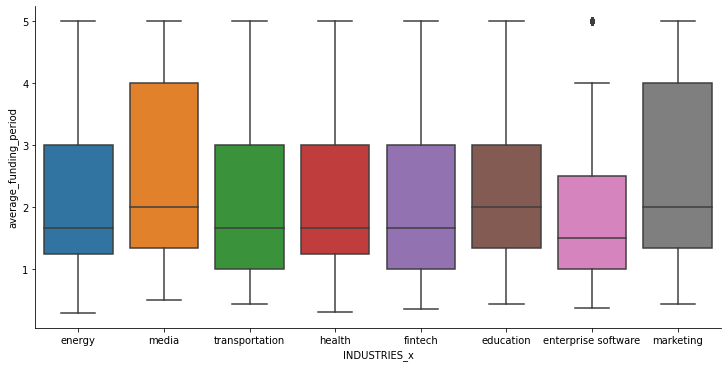

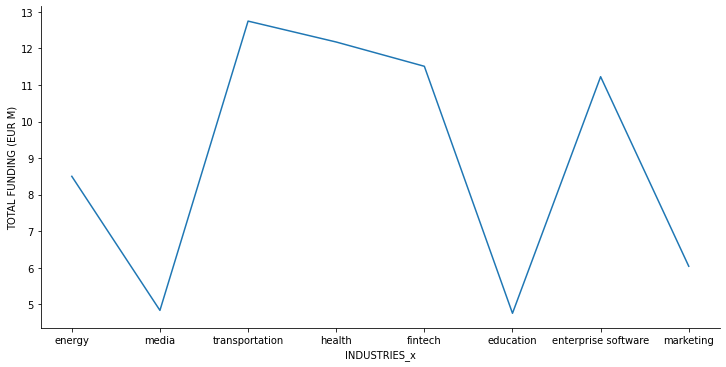

In [248]:
# fig, ax = plt.subplots() 
ax = sns.catplot(y="average_funding_period", data=dfd_relevant_industries, kind="box", x="INDUSTRIES_x", aspect=2)
ax = sns.relplot(y="TOTAL FUNDING (EUR M)", data=dfd_relevant_industries, kind="line", x="INDUSTRIES_x", aspect=2, ax=ax)

In [249]:
# ax = sns.countplot(y="INDUSTRIES_x", data=dfd_industries)


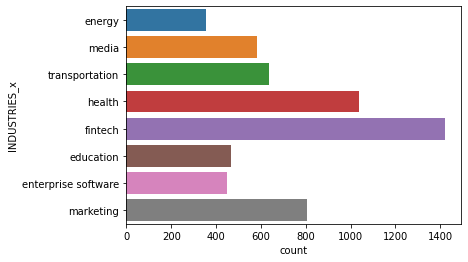

In [250]:
ax = sns.countplot(y="INDUSTRIES_x", data=dfd_relevant_industries)

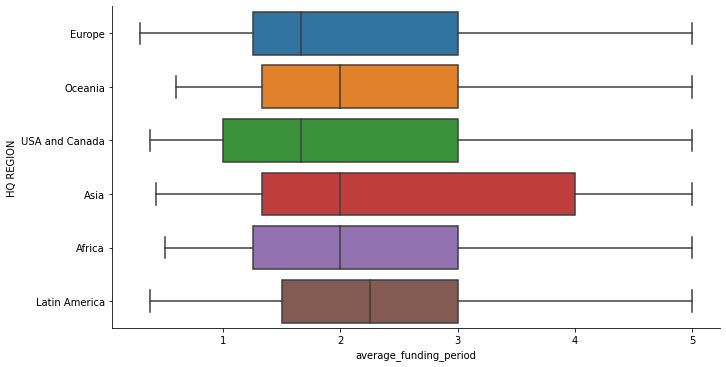

In [251]:
ax = sns.catplot(x="average_funding_period", data=dfd_relevant_industries, kind="box", y="HQ REGION", orient="h", aspect=2)

In [252]:
dfd_relevant_industries[['average_funding_period', 'TOTAL FUNDING (EUR M)', 'TOTAL ROUNDS NUMBER', 'N_MALES', 'N_FEMALES']].corr()

,average_funding_period,TOTAL FUNDING (EUR M),TOTAL ROUNDS NUMBER,N_MALES,N_FEMALES
average_funding_period,1.000000,-0.210839,-0.777023,-0.118656,-0.015158
TOTAL FUNDING (EUR M),-0.210839,1.000000,0.272299,0.045818,-0.022389
TOTAL ROUNDS NUMBER,-0.777023,0.272299,1.000000,0.134291,0.005129
N_MALES,-0.118656,0.045818,0.134291,1.000000,-0.302263
N_FEMALES,-0.015158,-0.022389,0.005129,-0.302263,1.000000


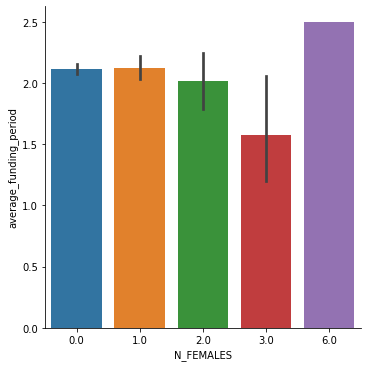

In [253]:
sns.catplot(y="average_funding_period", data=dfd_relevant_industries, kind="bar", x="N_FEMALES")

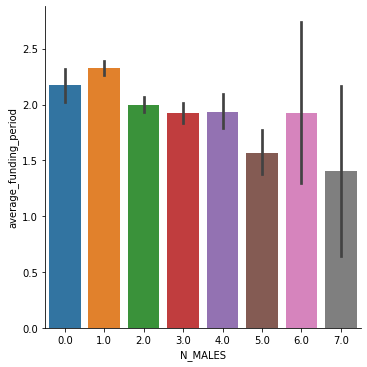

In [254]:
sns.catplot(y="average_funding_period", data=dfd_relevant_industries, kind="bar", x="N_MALES")

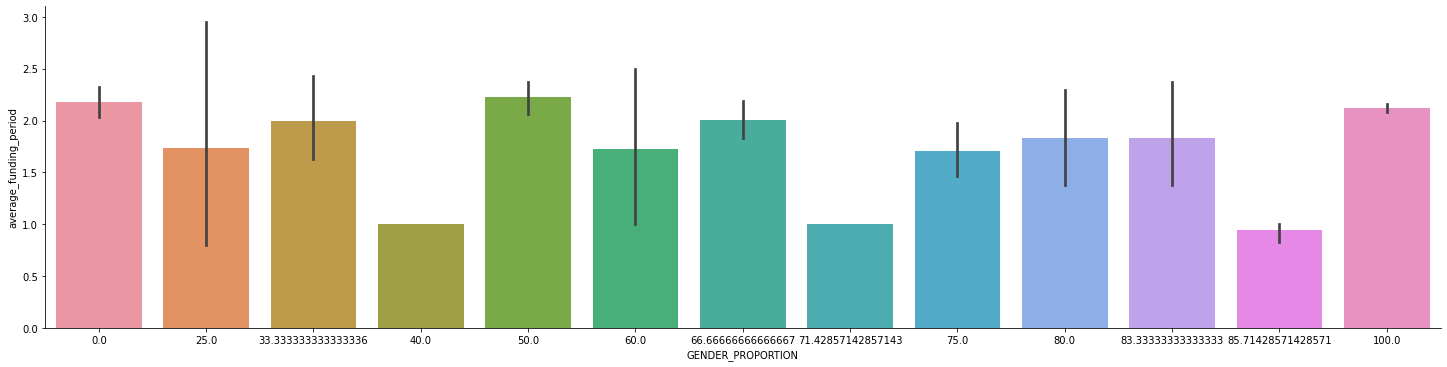

In [256]:
sns.catplot(y="average_funding_period", data=dfd_relevant_industries, kind="bar", x="GENDER_PROPORTION", aspect=4)